In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import sys
import os
sys.path.append('../../../scripts/')
import data_cleaning

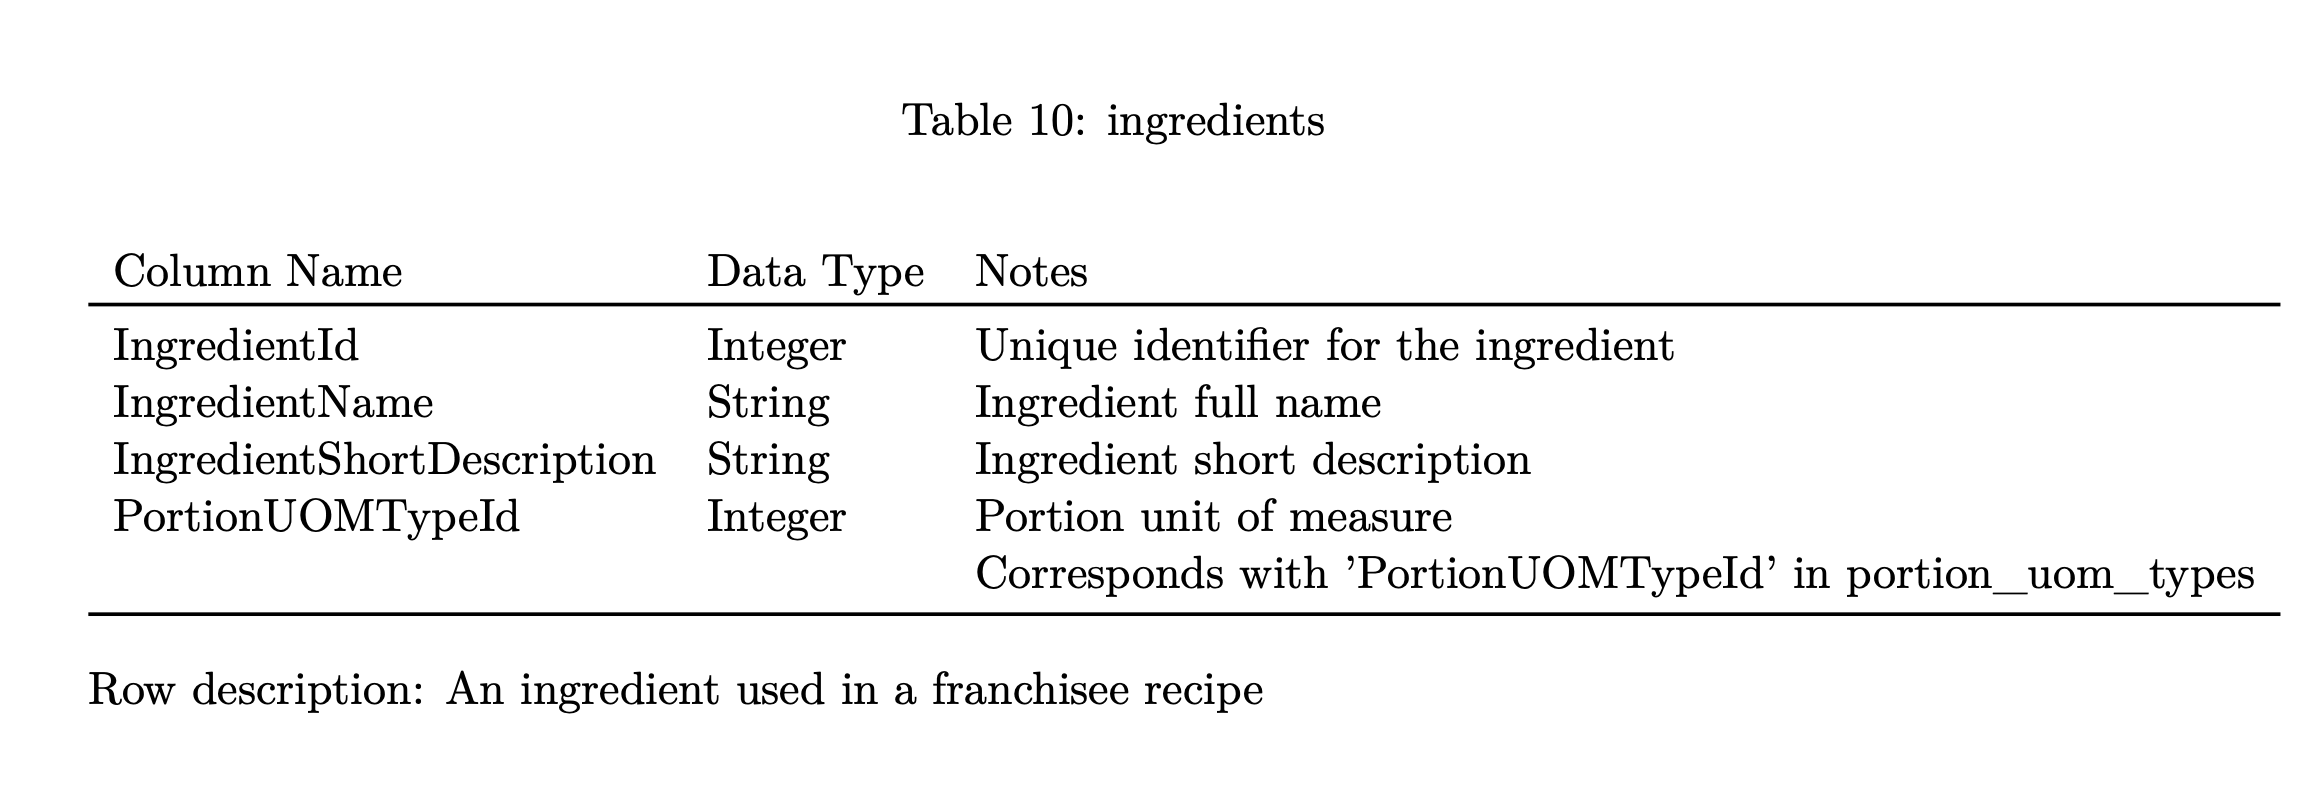

In [45]:
df = pd.read_csv("../../../data/raw/ingredients.csv")

In [46]:
df.head()

,IngredientName,IngredientShortDescription,IngredientId,PortionUOMTypeId
0,Bread ...,Bread Stick 12 inch/30cm,1,11.0
1,Bacon ...,Bacon,2,11.0
2,Chicken Strips ...,Chicken Strips,3,15.0
3,Chicken. oven roasted patty ...,"Chicken, single piece",4,15.0
4,Cold Cut Combo ...,Cold Cut Combo,5,15.0


# 1. Kiểm tra kiểu dữ liệu

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IngredientName              673 non-null    object 
 1   IngredientShortDescription  673 non-null    object 
 2   IngredientId                673 non-null    int64  
 3   PortionUOMTypeId            637 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 21.2+ KB


# 2. Kiểm tra khoảng trắng

## 2.1 Kiểm tra

In [48]:
df.select_dtypes(include="object").columns

Index(['IngredientName', 'IngredientShortDescription'], dtype='object')

In [49]:
df['IngredientName'].unique()

array(['Bread                                              ',
       'Bacon                                              ',
       'Chicken Strips                                     ',
       'Chicken. oven roasted patty                        ',
       'Cold Cut Combo                                     ',
       'Salami                                             ',
       'Ham                                                ',
       'Meatballs                                          ',
       'Pepperoni                                          ',
       'Roast Beef                                         ',
       'Steak, Shaved                                      ',
       'Tuna                                               ',
       'Turkey                                             ',
       'Cheese, Sliced cheese                              ',
       'Cookies                                            ',
       'Flatbread                                          ',
       '

## 2.2 Xử lý

In [50]:
df = data_cleaning.remove_whitespace(df)

In [51]:
df['IngredientName'].unique()
df['IngredientShortDescription'].unique()

array(['Bread Stick 12 inch/30cm', 'Bacon', 'Chicken Strips',
       'Chicken, single piece', 'Cold Cut Combo', 'Salami', 'Ham',
       'Meatballs', 'Pepperoni', 'Roast Beef', 'Steak, Philly style',
       'Tuna', 'Turkey', 'Cheese, Sliced cheese', 'Cookies', 'Flatbread',
       'Olives', 'Pickles', 'Jalapeno Peppers', 'Banana Peppers',
       'Apple slices', 'Chips', 'Yogurt, cup single serve',
       'DELETE Cucumbers', 'Green Peppers', 'Onions', 'Lettuce',
       'Tomatoes', 'Bottled Beverages', 'Cheese, Shredded Montere',
       'Parmesan Cheese, grated', 'Oregano', 'Mayonnaise',
       'DELETE Mustard', 'Ranch Dressing', 'Buffalo Sauce',
       'Chipotle Southwest Sauce', 'Honey Mustard Sauce, fat',
       'Sweet Onion Sauce, fat f', 'Teriyaki Glaze, fat free',
       'DELETE Olive Oil Blend', 'Salt & Pepper Blend',
       'Vinegar, Red Wine', 'Milk, bottle', 'Cold Cup, 21 oz.',
       'Cold Cup & Lid, 32 oz.', 'Avocado', 'Bagels', 'Biscuits',
       'BBQ Rib Patty', 'BBQ Sauce', 

# 3. Kiểm tra giá trị thiếu

## 3.1 Kiểm tra

In [52]:
df.isna().sum()

IngredientName                 0
IngredientShortDescription     0
IngredientId                   0
PortionUOMTypeId              36
dtype: int64

In [53]:
df.shape

(673, 4)

## 3.2 Xử lý
- Giá trị thiếu liên quan đến giá trị đo lường, để tránh ảnh hưởng tới IngredientId nên thay thế các giá trị null = 0

In [54]:
df['PortionUOMTypeId'] = df['PortionUOMTypeId'].fillna(0)

In [55]:
df.isna().sum()

IngredientName                0
IngredientShortDescription    0
IngredientId                  0
PortionUOMTypeId              0
dtype: int64

# 4. Kiểm tra trùng lặp

In [56]:
df.duplicated().sum()

0

# 5. Lưu trữ dữ liệu

In [57]:
# current_date = datetime.now().strftime("%Y%m%d")
# parent_dir = "../../../data/processed" 

# # Tạo đường dẫn đầy đủ cho thư mục mới
# new_folder_path = os.path.join(parent_dir, current_date)

# # Kiểm tra xem thư mục đã tồn tại chưa, nếu chưa thì tạo mới
# if not os.path.exists(new_folder_path):
#     os.makedirs(new_folder_path)
#     print(f"Thư mục '{new_folder_path}' đã được tạo thành công!")
# else:
#     print(f"Thư mục '{new_folder_path}' đã tồn tại.")

# df.to_csv(f'{new_folder_path}/10.ingredients_{current_date}.csv', index=False)

Thư mục '../../../data/processed/20240722' đã tồn tại.
